# Simulating ARIMAX Time Series With Exogenous Variables and Seasonality

## 1) Import Modules

In [ ]:
### Import Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from src.utils.paths import *
from src.simulation.class_SarimaxSimulation import SarimaxSimulation

Loading helper functions...
Loading paths...


## 2) Simulation Settings

In [ ]:
### Set number of periods
start = "2004-01"
end = "2023-12"

# Alternative (has to be specified as arg in function call !)
# years = 10
# nsimulations = years * 12 

### Set Seed
seed = 42

## 3) Simulations: Exogenous

### 3.1) Exogenous Variable 1

#### 3.1.1) Parameters

In [ ]:
# Make sure you define all coefficients you need, when changing the model order!
# Leave empty when not defined

# Trend
trend = True
trend_value = 0.94

# ARIMA
order = (1, 1, 3) # p, d, q
ar_coefs = [0.2]
ma_coefs = [0.4, 0.25, 0.1]

# Seasonal Component
seasonal_order = (2, 0, 0, 12) # P, D, Q, m
sar_coefs = [0.05, 0.01]
sma_coefs = []

# Error Term (Shock) Variance
shock_sigma2 = 100

# Bound Series?
bounded = True
lower_bound = 200
upper_bound = 500  


#### 3.1.2) Model Setup and Simulation

In [ ]:
exo1_model = SarimaxSimulation(
        start = start,
        end = end,
        order = order, seasonal_order = seasonal_order, trend = trend, trend_value = trend_value, 
        ar_coefs = ar_coefs, ma_coefs = ma_coefs, 
        sar_coefs = sar_coefs, sma_coefs = sma_coefs, 
        shock_sigma2 = shock_sigma2,
        bounded = bounded, lower_bound = lower_bound, upper_bound = upper_bound)

print(exo1_model.param_names)
print(exo1_model.params)

['intercept', 'ar.L1', 'ma.L1', 'ma.L2', 'ma.L3', 'ar.S.L12', 'ar.S.L24', 'sigma2']
[0.94, 0.2, 0.4, 0.25, 0.1, 0.05, 0.01, 100]


In [ ]:
exo1_ts = exo1_model.simulate(seed)

exo1_ts.head()

Month
2004-01    427.858425
2004-02    434.081518
2004-03    453.840690
2004-04    459.698299
2004-05    462.895440
              ...    
2023-08    333.691279
2023-09    326.837206
2023-10    314.067361
2023-11    309.131362
2023-12    305.043986
Freq: M, Name: simulated_data, Length: 240, dtype: float64

### 3.2) Exogenous Variable 2

#### 3.2.1) Parameters

In [ ]:
# Trend
trend = False
trend_value = -0.1

# ARIMA (p,d,q)
order = (2, 1, 4)
ar_coefs = [0.7, 0.01]
ma_coefs = [0.5, 0.2, 0.1, -0.1]

# Seasonal Component (P,D,Q,m)
seasonal_order = (1, 0, 0, 12)
sar_coefs = [0.2]
sma_coefs = []

# Error Term (Shock) Variance
shock_sigma2 = 1

# Bound Series?
bounded = True
lower_bound = 40
upper_bound = 80   

#### 3.2.2.) Model Setup and Simulation

In [ ]:
exo2_model = SarimaxSimulation(
        start = start,
        end = end,
        order = order, seasonal_order = seasonal_order, trend = trend, trend_value = trend_value, 
        ar_coefs = ar_coefs, ma_coefs = ma_coefs, 
        sar_coefs = sar_coefs, sma_coefs = sma_coefs, 
        shock_sigma2 = shock_sigma2,
        bounded = bounded, lower_bound = lower_bound, upper_bound = upper_bound)

print(exo2_model.param_names)
print(exo2_model.params)

['ar.L1', 'ar.L2', 'ma.L1', 'ma.L2', 'ma.L3', 'ma.L4', 'ar.S.L12', 'sigma2']
[0.7, 0.01, 0.5, 0.2, 0.1, -0.1, 0.2, 1]


In [ ]:
exo2_ts = exo2_model.simulate(seed)
exo2_ts.head()

Month
2004-01    54.647757
2004-02    55.146338
2004-03    56.052128
2004-04    57.176673
2004-05    60.147701
             ...    
2023-08    76.601056
2023-09    77.161015
2023-10    78.832093
2023-11    79.634390
2023-12    80.000000
Freq: M, Name: simulated_data, Length: 240, dtype: float64

### 3.3) Exogenous Variable 3

#### 3.3.1) Parameters

In [ ]:
# Trend
trend = True
trend_value = 0.1

# ARIMA (p,d,q)
order = (3, 1, 1)
ar_coefs = [0.15, -0.01, -0.01]
ma_coefs = [0.35]

# Seasonal Component (P,D,Q,m)
seasonal_order = (2, 0, 1, 12)
sar_coefs = [0.3, 0.2]
sma_coefs = [-0.2]

# Error Term (Shock) Variance
shock_sigma2 = 4

# Bound Series?
bounded = True
lower_bound = 900
upper_bound = 950   

#### 3.3.2) Model Setup and Simulation

In [ ]:
exo3_model = SarimaxSimulation(
        start = start,
        end = end,
        order = order, seasonal_order = seasonal_order, trend = trend, trend_value = trend_value, 
        ar_coefs = ar_coefs, ma_coefs = ma_coefs, 
        sar_coefs = sar_coefs, sma_coefs = sma_coefs, 
        shock_sigma2 = shock_sigma2,
        bounded = bounded, lower_bound = lower_bound, upper_bound = upper_bound)

print(exo3_model.param_names)
print(exo3_model.params)

['intercept', 'ar.L1', 'ar.L2', 'ar.L3', 'ma.L1', 'ar.S.L12', 'ar.S.L24', 'ma.S.L12', 'sigma2']
[0.1, 0.15, -0.01, -0.01, 0.35, 0.3, 0.2, -0.2, 4]


In [ ]:
exo3_ts = exo3_model.simulate(seed)
exo3_ts.head()

Month
2004-01    900.227182
2004-02    901.400994
2004-03    900.000000
2004-04    903.600176
2004-05    904.607542
              ...    
2023-08    928.927871
2023-09    931.522279
2023-10    930.504277
2023-11    931.799420
2023-12    929.708565
Freq: M, Name: simulated_data, Length: 240, dtype: float64

## 4) Simulation: Endogenous

### 4.1) Parameters

In [ ]:
# Exogenous Variables
exog = [exo1_ts, exo2_ts, exo3_ts]
exog_coefs = [0.3, 0.15, -0.1]

# Trend
trend = True
trend_value = 0.1

# ARIMA (p,d,q)
order = (1, 1, 5)
ar_coefs = [0.4]
ma_coefs = [0.15, 0.05, -0.005, -0.01, -0.01]

# Seasonal Component (P,D,Q,m)
seasonal_order = (4, 0, 0, 6)
sar_coefs = [0.1, -0.1, 0.05, -0.01]
sma_coefs = []

# Error Term (Shock) Variance
shock_sigma2 = 5

# Bound Series?
bounded = True
lower_bound = 40
upper_bound = 90

### 4.2) Model Setup and Simulation

In [ ]:
endo_model = SarimaxSimulation(
        exog = exog,
        exog_coefs = exog_coefs,
        start = start,
        end = end,
        order = order, seasonal_order = seasonal_order, trend = trend, trend_value = trend_value, 
        ar_coefs = ar_coefs, ma_coefs = ma_coefs, 
        sar_coefs = sar_coefs, sma_coefs = sma_coefs, 
        shock_sigma2 = shock_sigma2,
        bounded = bounded, lower_bound = lower_bound, upper_bound = upper_bound)

print(endo_model.param_names)
print(endo_model.params)

['intercept', 'simulated_data', 'simulated_data', 'simulated_data', 'ar.L1', 'ma.L1', 'ma.L2', 'ma.L3', 'ma.L4', 'ma.L5', 'ar.S.L6', 'ar.S.L12', 'ar.S.L18', 'ar.S.L24', 'sigma2']
[0.1, 0.3, 0.15, -0.1, 0.4, 0.15, 0.05, -0.005, -0.01, -0.01, 0.1, -0.1, 0.05, -0.01, 5]


In [ ]:
endo_ts = endo_model.simulate(seed)
endo_ts.head()

Month
2004-01    50.416638
2004-02    52.609652
2004-03    55.246371
2004-04    58.618803
2004-05    57.145080
             ...    
2023-08    54.918669
2023-09    55.032601
2023-10    58.349664
2023-11    56.515204
2023-12    57.666149
Freq: M, Name: simulated_data, Length: 240, dtype: float64

## 5) Plot Data

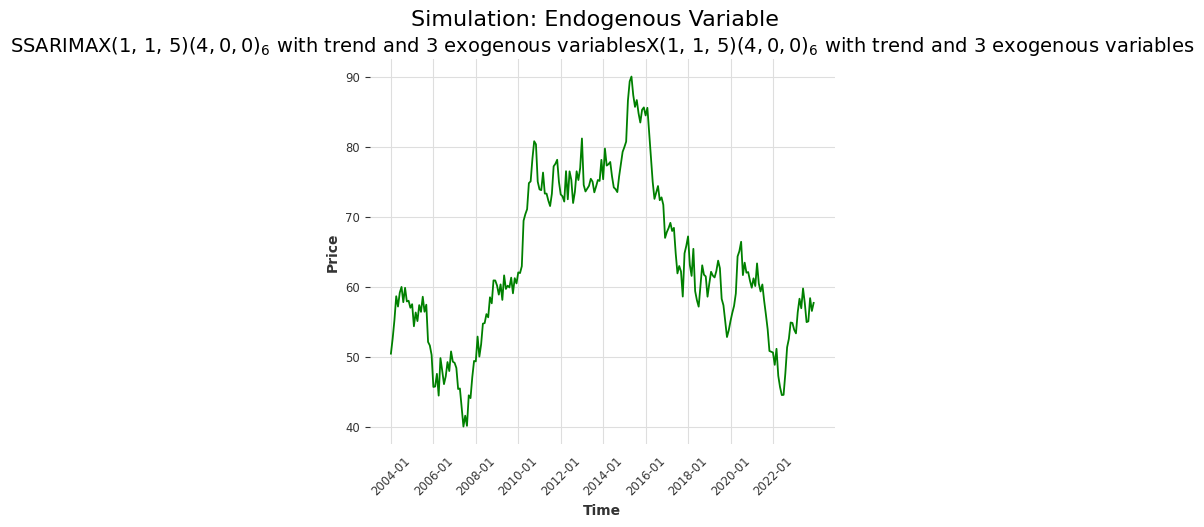

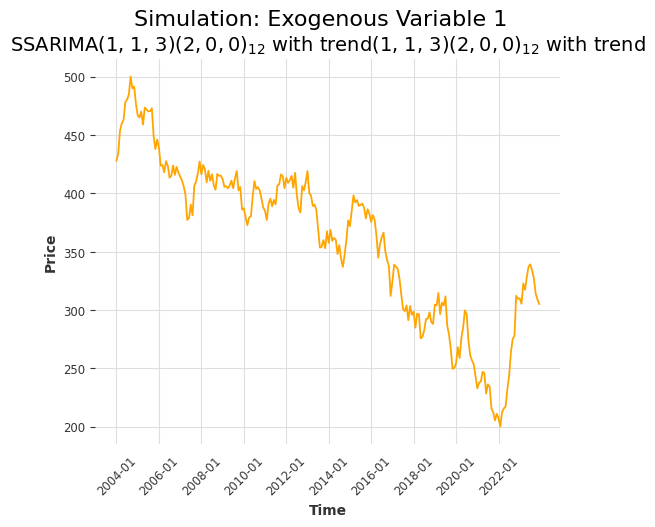

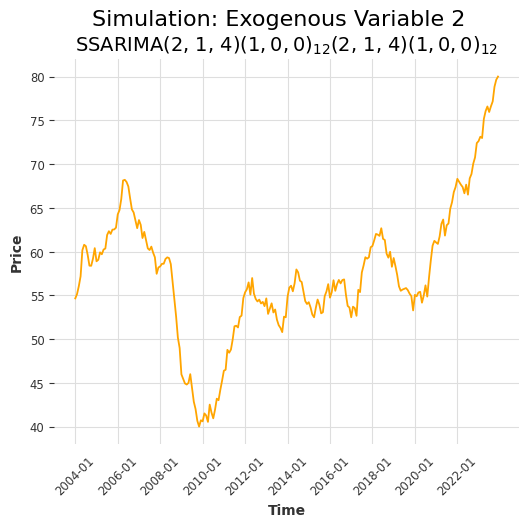

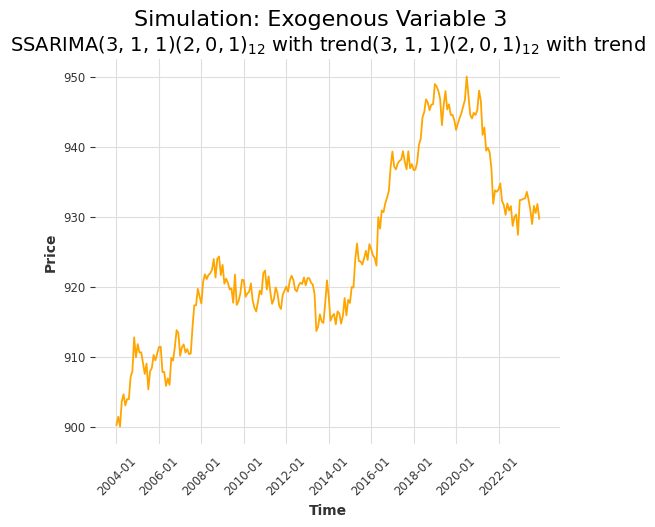

In [ ]:
endo_ts.plot("Simulation: Endogenous Variable", color = "green")

for i, ts in enumerate([exo1_ts, exo2_ts, exo3_ts]):
    ts.plot(f"Simulation: Exogenous Variable {i+1}", color = "orange")

## 5) Export Data

In [ ]:
# Concatenate the series into a dataframe
df = pd.concat([endo_ts, exo1_ts, exo2_ts, exo3_ts], axis=1)

# Rename Columns
df.columns = ['y', "x1", "x2", "x3"]

# Rename Index to 'Date'
df.index.name = "Date"
#df.insert(0, 'Date', endo_ts.index.to_series())

# Optionally, you can format the 'Date' column as 'MM-DD-YYYY'
df.index = df.index.to_timestamp().strftime('%Y-%m-%d')

# Display the resulting dataframe
print(df.head())

# Export as CSV
filename = f'simdata.csv'
df.to_csv(os.path.join(SIMDATA_DIR, filename))

                    y          x1         x2          x3
Date                                                    
01-01-2004  50.416638  427.858425  54.647757  900.227182
01-02-2004  52.609652  434.081518  55.146338  901.400994
01-03-2004  55.246371  453.840690  56.052128  900.000000
01-04-2004  58.618803  459.698299  57.176673  903.600176
01-05-2004  57.145080  462.895440  60.147701  904.607542
...               ...         ...        ...         ...
01-08-2023  54.918669  333.691279  76.601056  928.927871
01-09-2023  55.032601  326.837206  77.161015  931.522279
01-10-2023  58.349664  314.067361  78.832093  930.504277
01-11-2023  56.515204  309.131362  79.634390  931.799420
01-12-2023  57.666149  305.043986  80.000000  929.708565

[240 rows x 4 columns]


## 6) Add Noise to Variables to Immitate Measurement Error

In [ ]:
# Define the range for mean and standard deviation
mean_range = (-0.8, 0.8)
std_dev_range = (0.2, 0.9)

# Create a list to store the noisy time series
noisy_series = []

# Loop through each original time series
for ts in [endo_ts, exo1_ts, exo2_ts, exo3_ts]:
    # Randomly draw mean and standard deviation
    mean = np.random.uniform(*mean_range)
    std_dev = np.random.uniform(*std_dev_range)
    
    # Generate random noise
    noise = np.random.normal(mean, std_dev, len(ts))
    
    # Add noise to the original time series
    noisy_ts = ts + noise
    
    # Append the noisy time series to the list
    noisy_series.append(noisy_ts)


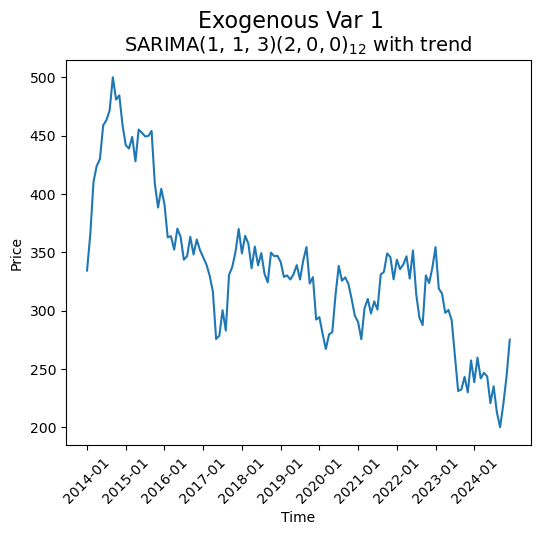

<Axes: title={'center': 'Exogenous Var 1 with noise'}, xlabel='Month'>

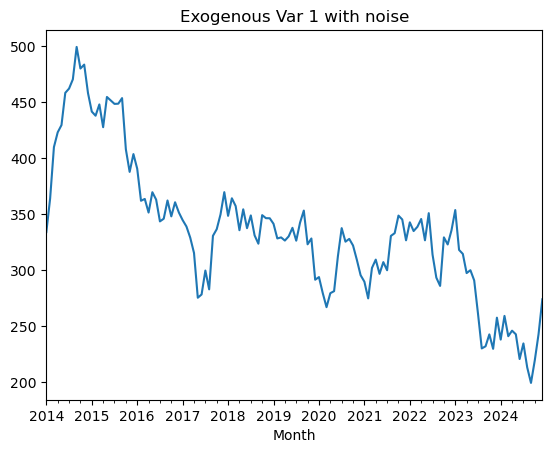

In [ ]:
# Take a look
exo1_ts.plot("Simulation: Exogenous Variable 1")
noisy_series[1].plot(title = "Simulation: Exogenous Variable 1 With Noise")

## 7) Export Noisy Data

In [ ]:
# Create empty dataframe
noisy_df = pd.DataFrame()

for ts in noisy_series:
    
    # Concatenate the series to dataframe
    noisy_df = pd.concat([noisy_df, ts], axis=1)

# Rename Columns
noisy_df.columns = ['y', "x1", "x2", "x3"]

# Rename Index to 'Date'
noisy_df.index.name = "Date"
#noisy_df.insert(0, 'Date', endo_ts.index.to_series())

# Optionally, you can format the 'Date' column as 'MM-DD-YYYY'
noisy_df.index = pd.PeriodIndex(noisy_df.index, freq = "M").to_timestamp().strftime('%d-%m-%Y')

# Display the resulting dataframe
print(noisy_df)

# Export as CSV
filename = f'noisy_simdata.csv'
noisy_df.to_csv(os.path.join(SIMDATA_DIR, filename))

                    y          x1         x2          x3
Date                                                    
01-01-2014  50.462822  334.043423  67.667477  901.076127
01-02-2014  58.475673  364.080849  66.326956  905.641172
01-03-2014  65.687695  409.939731  66.938354  903.995482
01-04-2014  69.380289  423.199287  67.647591  909.105808
01-05-2014  67.683462  429.659809  71.831250  910.636342
...               ...         ...        ...         ...
01-08-2024  71.276070  213.036886  63.796875  933.776841
01-09-2024  69.717262  199.133163  62.960070  934.396389
01-10-2024  73.978551  219.275246  61.038563  941.066733
01-11-2024  77.563093  242.808125  59.768522  935.569471
01-12-2024  83.696095  273.915092  59.565512  939.673132

[132 rows x 4 columns]
